<a href="https://colab.research.google.com/github/moch1996/MachineLearningProj/blob/master/assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the Data

In [403]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [308]:
# import data with numpy
data_train = np.genfromtxt('training.txt', delimiter=',')
data_test = np.genfromtxt('testing.txt', delimiter=',')

In [309]:
data_train[0,0] = 7.609000000000000208e-01
data_test[0,0] = 1.007260000000000044e+00

In [310]:
# number of training data
n_train = data_train.shape[0]
n_test = data_test.shape[0]

In [318]:
# training data
x1_train          = data_train[:,0] # feature1
x2_train          = data_train[:,1] # feature2
y_train           = data_train[:,2][:,None] # label
idx_class0_train  = (data_train[:,2]==0) # index of class 0
idx_class1_train  = (data_train[:,2]==1) # index of class 1

In [312]:
# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1

In [450]:
# Set the theta
init_theta = np.zeros((10,10))
for i in range(10) :
  for j in range(10) :
    init_theta[j,i] = random.uniform(1e-1,2e-1)

init_theta

array([[0.10117891, 0.14767281, 0.15003813, 0.18369297, 0.16691878,
        0.12434845, 0.14928107, 0.17948664, 0.1876745 , 0.15951889],
       [0.19620646, 0.16918841, 0.17070387, 0.17804371, 0.10375281,
        0.11709467, 0.15349568, 0.13207607, 0.1676192 , 0.132675  ],
       [0.14914907, 0.17770713, 0.13983105, 0.16580894, 0.10058204,
        0.14434124, 0.10401152, 0.10320562, 0.18184284, 0.14998241],
       [0.11567536, 0.12336722, 0.13696311, 0.11677086, 0.17709868,
        0.13639612, 0.19963394, 0.16309433, 0.17317637, 0.10371642],
       [0.12287454, 0.15041894, 0.17423256, 0.10529943, 0.12309737,
        0.15560382, 0.18034987, 0.1510077 , 0.19368742, 0.10834921],
       [0.13447272, 0.11402146, 0.17362945, 0.17638818, 0.14866418,
        0.1899271 , 0.13878177, 0.14759613, 0.11061525, 0.14154837],
       [0.13427647, 0.16395012, 0.17397149, 0.10640892, 0.11181734,
        0.12395011, 0.18275364, 0.107191  , 0.1342024 , 0.11033464],
       [0.14515449, 0.12511739, 0.1348967

In [454]:
theta = init_theta

In [282]:
X = np.ones((200,100))
for i in range(100) :
  for j in range(100) :
    X[:,j] = (x1_train**i)*(x2_train**j)
      

In [315]:
# Feature function
def feature(x1, x2, theta) :
  feature_matrix = np.ones((10,10,200))
  for i in range(10) :
    for j in range(10) :
      feature_matrix[j,i] = theta[j,i] * (x1**j) * (x2**i)

  return feature_matrix

In [228]:
# Feature function
def feature2(x1,x2,theta) :
  matrix = np.ones((10,10))
  x1 = x1.reshape(x1.shape[0],1)
  x2 = x2.reshape(x2.shape[0],1)
  for i in range(10) :
    for j in range(10) :
      matrix[i,j] = theta[i,j] * np.dot((x1**i).T , x2**j)
  return np.sum(matrix)

In [229]:
feature2(x1_train,x2_train,theta)

3.996555651886597

In [316]:
# sigmoid function
def sigmoid(z) :
  sigmoid_f = 1 / (1+np.exp(-z))
  return sigmoid_f

In [317]:
# Prediction function definition
def f_pred(x1, x2, theta) :
  p = sigmoid(feature(x1,x2,theta))
  return p

In [331]:
h_arr = f_pred(x1_train,x2_train,theta)

In [487]:
# Loss function
def ce_loss(label, f_pred, theta, lamb) :
  n       =  len(label)
  rho     =  np.mean(-label.T * np.log(f_pred + 1e-8) - (1-label).T * np.log(1 - f_pred+1e-8)) 
  gamma   =  np.sum(theta**2)
  loss    =  rho + gamma *(lamb/2)
  return loss

In [329]:
# Grad loss function
def grad_loss()

0.6930492327945231

In [341]:
X = np.ones((200,100))

In [342]:
for i in range(10) :
  X[:,i] = (x1_train**i) * (x2_train**0)

In [364]:
for i in range(10,20) :
  X[:,i] = (x1_train**(i-10)) * (x2_train**1)

In [369]:
for i in range(20,30) :
  X[:,i] = (x1_train**(i-20)) * (x2_train**2)

In [371]:
for i in range(30,40) :
  X[:,i] = (x1_train**(i-30)) * (x2_train**3)

In [372]:
for i in range(40,50) :
  X[:,i] = (x1_train**(i-40)) * (x2_train**4)

In [373]:
for i in range(50,60) :
  X[:,i] = (x1_train**(i-50)) * (x2_train**5)

In [374]:
for i in range(60,70) :
  X[:,i] = (x1_train**(i-60)) * (x2_train**6)

In [375]:
for i in range(70,80) :
  X[:,i] = (x1_train**(i-70)) * (x2_train**7)

In [376]:
for i in range(80,90) :
  X[:,i] = (x1_train**(i-80)) * (x2_train**8)

In [377]:
for i in range(90,100) :
  X[:,i] = (x1_train**(i-90)) * (x2_train**9)

In [381]:
X.shape

(200, 100)

In [453]:
theta=init_theta.reshape(100,-1)
theta.shape

(100, 1)

In [388]:
#real
def pls_pred(X,theta) :
  p = sigmoid(np.dot(X,theta))
  return p

In [391]:
prediction = pls_pred(X,theta)

In [488]:
#real
def pls_loss(label, pls_pred):  # cross-entropy error
    
    return np.mean(-label * np.log(pls_pred + 1e-8) - (1-label) * np.log(1 - pls_pred + 1e-8)) 


In [489]:
pls_loss(y_train,prediction)

0.6833482879611114

In [490]:
#real
def plsgrad_loss(pls_pred,label, X) :
  n = len(label)
  loss = (2 * np.dot(X.T, pls_pred - label)) / n
  return loss

In [398]:
plsgrad_loss(prediction, y_train, X).shape

(100, 1)

In [491]:
#real
def grad_desc(X, label , theta_init, tau,lamb,iteration):

    n = len(label)
    loss_history = np.zeros(iteration)
    coef_history = np.zeros((iteration,100))
    theta2 = theta_init # initialization

    for i in range(iteration): # loop over the iterations
        y_pred =  pls_pred(X,theta2)
        grad_f =  plsgrad_loss(y_pred,label,X) # gradient of the loss  
        theta2 = (1- tau*lamb)*theta2 - tau*grad_f # update rule of gradient descent  
        loss_history[i] = pls_loss(label,y_pred) # save the current loss value
        coef_history[i,:] = theta2.T 
        
    return theta2, loss_history, coef_history

In [486]:
(1-tau*lamb)

0.5

In [570]:
# run gradient descent algorithm
start = time.time()
w_init = np.zeros(10)[:,None]
tau = 1
iteration = 4000
lamb = 1e-5
theta2, loss_history, coef_history = grad_desc(X, y_train , theta, tau, lamb, iteration)

print('TIME=',time.time()-start)
print(loss_history[-1])
#print(coef_history[-1].reshape(100,1))

TIME= 0.49819135665893555
0.06406560386000112


In [532]:
theta[:5]

array([[0.11577806],
       [0.13673755],
       [0.11620745],
       [0.11504881],
       [0.14641975]])

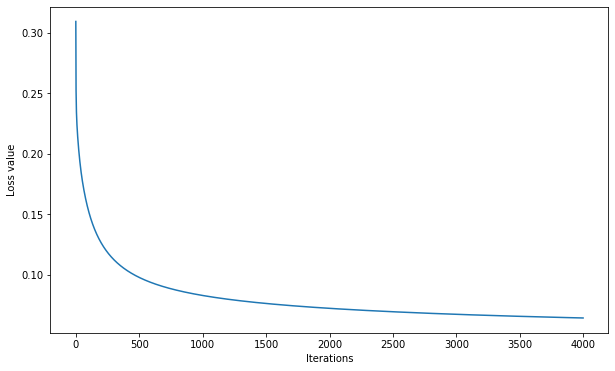

In [571]:
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

In [455]:
# Set the theta
init_theta = np.zeros((10,10))
for i in range(10) :
  for j in range(10) :
    init_theta[j,i] = random.uniform(1e-1,2e-1)

init_theta

array([[0.11577806, 0.13673755, 0.11620745, 0.11504881, 0.14641975,
        0.17568129, 0.12604608, 0.10832476, 0.12309584, 0.16582497],
       [0.11489435, 0.19678419, 0.17742107, 0.14430922, 0.16160654,
        0.15774797, 0.10779051, 0.18920069, 0.14673045, 0.14125863],
       [0.11138833, 0.14366378, 0.16332828, 0.16876222, 0.1591364 ,
        0.16165535, 0.18007682, 0.12938744, 0.16798243, 0.15652168],
       [0.19716164, 0.16009127, 0.13318581, 0.11170808, 0.19804675,
        0.12114674, 0.10075135, 0.18787659, 0.17499162, 0.19968722],
       [0.11019005, 0.17278639, 0.1142757 , 0.12364748, 0.11158329,
        0.10163056, 0.11819873, 0.1679147 , 0.17731001, 0.18904346],
       [0.1083806 , 0.11506604, 0.11361429, 0.13445826, 0.16612054,
        0.18678548, 0.1890908 , 0.1640649 , 0.19284755, 0.18193967],
       [0.12866825, 0.10545458, 0.17018818, 0.19971857, 0.1367034 ,
        0.18873734, 0.17854228, 0.19958197, 0.14899273, 0.10120165],
       [0.13924044, 0.13020147, 0.1015051

In [457]:
theta = init_theta.reshape(100,1)

In [ ]:
# Plot 

#OUTPUT

1. Plot the training data

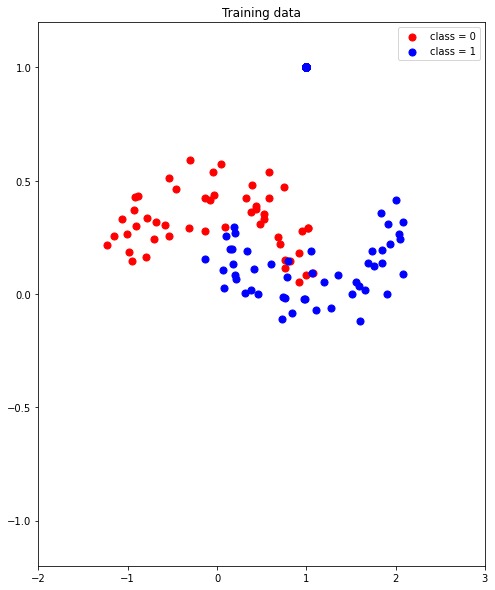

In [587]:
plt.figure(1,figsize=(8,10))
plt.scatter(x1_train[idx_class0_train],x2_train[idx_class0_train], s=50, c='r', label ='class = 0')
plt.scatter(x1_train[idx_class1_train],x2_train[idx_class1_train], c='blue', s=50, label = 'class = 1')
plt.title('Training data')
plt.legend(loc='best')
plt.xlim(-2,3)
plt.ylim(-1.2,1.2)
plt.show()

2. Plot the test data

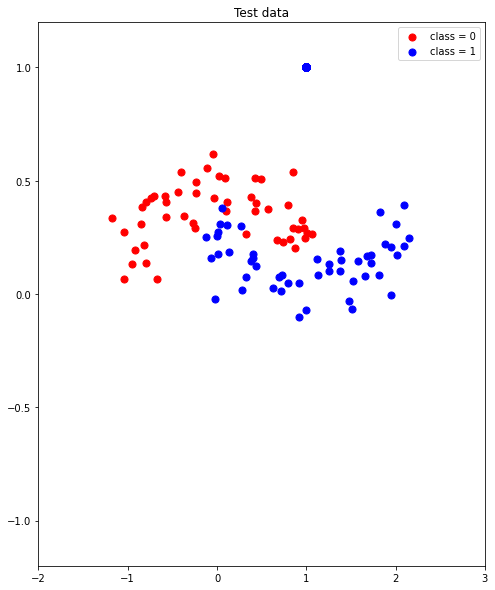

In [588]:
plt.figure(1,figsize=(8,10))
plt.scatter(x1_test[idx_class0_test],x2_test[idx_class0_test], s=50, c='r', label ='class = 0')
plt.scatter(x1_test[idx_class1_test],x2_test[idx_class1_test], c='blue', s=50, label = 'class = 1')
plt.title('Test data')
plt.legend(loc='best')
plt.xlim(-2,3)
plt.ylim(-1.2,1.2)
plt.show()